In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import nltk

!pip install nltk
!pip install textblob
!pip install wordcloud


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from textblob import Word, TextBlob
from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
content = """ On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France. During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.

She mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. Furthermore, she highlighted the role of open-source libraries, such as spaCy and NLTK, in democratizing access to natural language processing tools. According to her, students and researchers can now build high-quality NLP models without needing large financial resources.

"AI is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." After the session, attendees from universities like Stanford, MIT, and Oxford approached her to discuss future collaboration opportunities.

At 5:45 PM, she posted a summary of her speech on Twitter, receiving over 8,000 likes and 1,200 retweets within a few hours. Her tweet included hashtags like #AIethics, #DataPrivacy, and #NLPtools.

The event concluded with a panel discussion moderated by Mr. John Lee, a journalist from TechWorld Weekly, who asked, “How can governments regulate AI without stifling innovation?” """

In [6]:
content_lower = content.lower()

In [7]:
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
cumleler = sent_tokenize(content_lower)
kelimeler = word_tokenize(content_lower)
print("Cümleler:", cumleler)
print("Kelimeler:", kelimeler)


Cümleler: [' on january 3rd, 2023, dr. emily watson, a senior data scientist at greenai inc., gave a keynote speech at the international conference on artificial intelligence in paris, france.', 'during her talk, she emphasized the importance of ethical ai and data privacy, citing recent cases of misuse in various industries.', 'she mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million.', 'furthermore, she highlighted the role of open-source libraries, such as spacy and nltk, in democratizing access to natural language processing tools.', 'according to her, students and researchers can now build high-quality nlp models without needing large financial resources.', '"ai is not just about machines," she said, "it’s about how we interact with technology in a human-centered way."', 'after the session, attendees from universities like stanford, mit, and oxford approached her to discuss future collaboration opportunitie

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
import string   #regex ile de string.punctuation ile de oluyormuş farklı yol denemek istedim.
words_no_punct = [w for w in kelimeler if w not in string.punctuation]
print(words_no_punct[:20])

['on', 'january', '3rd', '2023', 'dr.', 'emily', 'watson', 'a', 'senior', 'data', 'scientist', 'at', 'greenai', 'inc.', 'gave', 'a', 'keynote', 'speech', 'at', 'the']


In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

words_no_stop = [w for w in words_no_punct if w not in stop_words]
print(words_no_stop[:20])

['january', '3rd', '2023', 'dr.', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc.', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import re  #isdigit() daha kontrollü temizliyormuş, 3rd silinmediğinde bunu fark edip araştırdım.
#tekrar regex ile yapıcam.

words_no_num = [w for w in words_no_stop if not w.isdigit()]
print(words_no_num[:20])

['january', '3rd', 'dr.', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc.', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk']


In [13]:
words_no_num = [w for w in words_no_stop if not re.search(r"\d", w)]
print(words_no_num)

['january', 'dr.', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc.', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasized', 'importance', 'ethical', 'ai', 'data', 'privacy', 'citing', 'recent', 'cases', 'misuse', 'various', 'industries', 'mentioned', 'million', 'users', 'affected', 'data', 'breach', 'last', 'year', 'resulting', 'damages', 'estimated', 'million', 'furthermore', 'highlighted', 'role', 'open-source', 'libraries', 'spacy', 'nltk', 'democratizing', 'access', 'natural', 'language', 'processing', 'tools', 'according', 'students', 'researchers', 'build', 'high-quality', 'nlp', 'models', 'without', 'needing', 'large', 'financial', 'resources', '``', 'ai', 'machines', "''", 'said', '``', '’', 'interact', 'technology', 'human-centered', 'way', "''", 'session', 'attendees', 'universities', 'like', 'stanford', 'mit', 'oxford', 'approached', 'discuss', 'future', 'collaboration', 'opportuni

In [14]:
temiz_token = words_no_num
print(temiz_token[:50])

['january', 'dr.', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc.', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasized', 'importance', 'ethical', 'ai', 'data', 'privacy', 'citing', 'recent', 'cases', 'misuse', 'various', 'industries', 'mentioned', 'million', 'users', 'affected', 'data', 'breach', 'last', 'year', 'resulting', 'damages', 'estimated', 'million', 'furthermore', 'highlighted', 'role', 'open-source', 'libraries', 'spacy', 'nltk']


In [21]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
from nltk import pos_tag

pos_tags = pos_tag(temiz_token)
print(pos_tags[:20])

# bu çıktıda bazı yanlış etiketlemeler olduğu için (lowecase sebebiyle) başka bir yöntem denicem.

[('january', 'JJ'), ('dr.', 'NN'), ('emily', 'RB'), ('watson', 'JJ'), ('senior', 'JJ'), ('data', 'NNS'), ('scientist', 'NN'), ('greenai', 'VBP'), ('inc.', 'NNS'), ('gave', 'VBD'), ('keynote', 'VBN'), ('speech', 'JJ'), ('international', 'JJ'), ('conference', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('paris', 'NN'), ('france', 'NN'), ('talk', 'NN'), ('emphasized', 'VBD')]


In [23]:
doc_cased = nlp(content)

In [26]:
clean_lemmas = [
    t.lemma_.lower()
    for t in doc_cased
    if not t.is_space
    and not t.is_punct
    and not t.is_stop
    and not t.like_num
    and not re.search(r"\d", t.text)
]
print(clean_lemmas[:30])

['january', 'dr.', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc.', 'give', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasize', 'importance', 'ethical', 'ai', 'data', 'privacy', 'cite', 'recent', 'case', 'misuse', 'industry']


In [25]:
pos_samples = [(t.text, t.pos_, t.lemma_) for t in doc_cased if not t.is_punct and not t.is_space][:25]
print(pos_samples)

nouns = [t.lemma_.lower() for t in doc_cased if t.pos_ == "NOUN"]
verbs = [t.lemma_.lower() for t in doc_cased if t.pos_ == "VERB"]
adjs  = [t.lemma_.lower() for t in doc_cased if t.pos_ == "ADJ"]

[('On', 'ADP', 'on'), ('January', 'PROPN', 'January'), ('3rd', 'NOUN', '3rd'), ('2023', 'NUM', '2023'), ('Dr.', 'PROPN', 'Dr.'), ('Emily', 'PROPN', 'Emily'), ('Watson', 'PROPN', 'Watson'), ('a', 'DET', 'a'), ('senior', 'ADJ', 'senior'), ('data', 'NOUN', 'data'), ('scientist', 'NOUN', 'scientist'), ('at', 'ADP', 'at'), ('GreenAI', 'PROPN', 'GreenAI'), ('Inc.', 'PROPN', 'Inc.'), ('gave', 'VERB', 'give'), ('a', 'DET', 'a'), ('keynote', 'ADJ', 'keynote'), ('speech', 'NOUN', 'speech'), ('at', 'ADP', 'at'), ('the', 'DET', 'the'), ('International', 'PROPN', 'International'), ('Conference', 'PROPN', 'Conference'), ('on', 'ADP', 'on'), ('Artificial', 'PROPN', 'Artificial'), ('Intelligence', 'PROPN', 'Intelligence')]


In [29]:
people = [ent.text for ent in doc_cased if ent.ent_type_ == "PERSON"]
orgs   = [ent.text for ent in doc_cased if ent.ent_type_ == "ORG"]
gpes   = [ent.text for ent in doc_cased if ent.ent_type_ == "GPE"]
dates  = [ent.text for ent in doc_cased if ent.ent_type_ == "DATE"]

In [31]:
print(people, orgs, gpes, dates) #büyük ölçüde doğru çalışıyor gibi geldi bana.

['Emily', 'Watson', 'Twitter', 'NLPtools', 'John', 'Lee'] ['GreenAI', 'Inc.', 'the', 'International', 'Conference', 'on', 'Artificial', 'Intelligence', 'NLTK', 'NLP', 'Stanford', 'MIT', 'Oxford', 'TechWorld', 'Weekly'] ['Paris', 'France', 'AI'] ['January', '3rd', ',', '2023', 'last', 'year']


In [32]:
from collections import Counter

N = 20
freq_all = Counter(clean_lemmas).most_common(N)

print("Top-", N, "kelime:", freq_all)

Top- 20 kelime: [('data', 3), ('ai', 3), ('like', 3), ('speech', 2), ('january', 1), ('dr.', 1), ('emily', 1), ('watson', 1), ('senior', 1), ('scientist', 1), ('greenai', 1), ('inc.', 1), ('give', 1), ('keynote', 1), ('international', 1), ('conference', 1), ('artificial', 1), ('intelligence', 1), ('paris', 1), ('france', 1)]


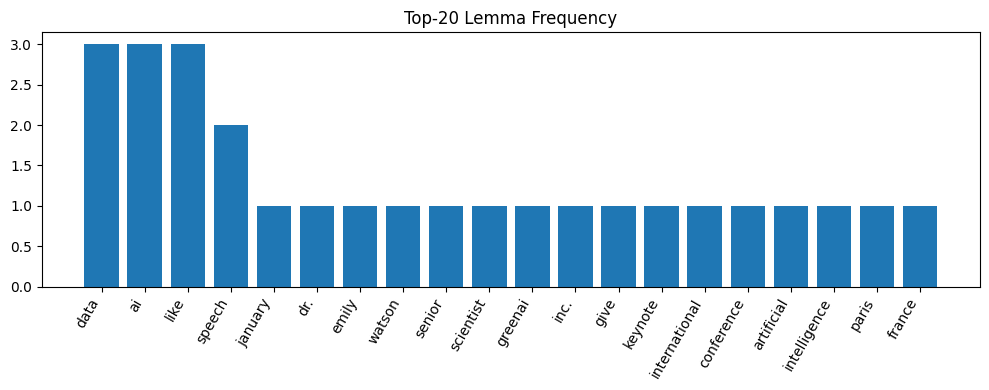

In [34]:
import matplotlib.pyplot as plt

if freq_all:
    words, counts = zip(*freq_all)
    plt.figure(figsize=(10,4))
    plt.bar(words, counts)
    plt.xticks(rotation=60, ha="right")
    plt.title(f"Top-{N} Lemma Frequency")
    plt.tight_layout()
    plt.show()

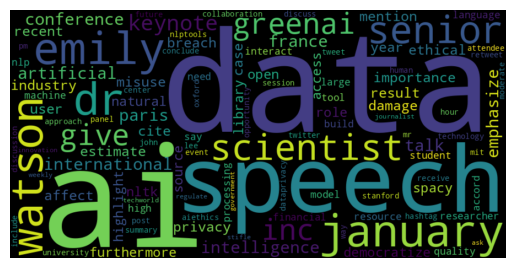

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=900, height=450, collocations=False).generate(" ".join(clean_lemmas))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()